# Simplify network topology and consolidate intersections (Ağ topolojisini basitleştirin ve kavşakları birleştirin)

In [1]:
import networkx as nx
import osmnx as ox

%matplotlib inline
ox.__version__

'1.3.0'

# 1. Complex intersection consolidation (Karmaşık kavşak konsolidasyonu)

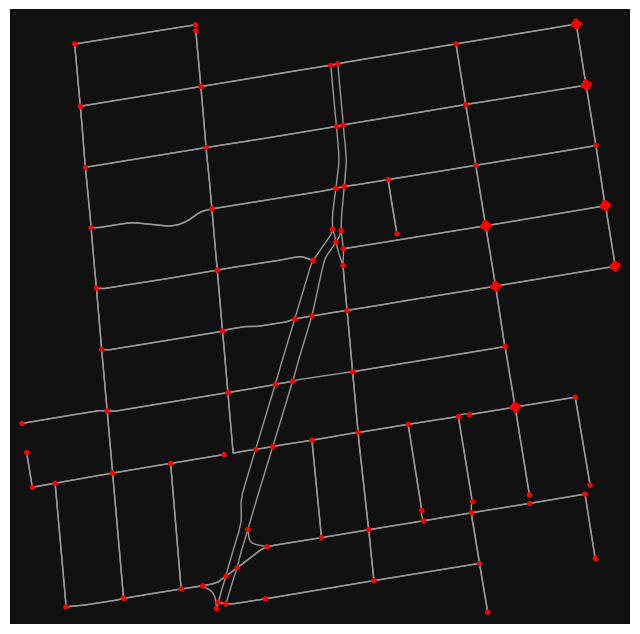

In [2]:
# get a street network and plot it with all edge intersections
# (bir sokak ağı edinin ve onu tüm kenar kavşaklarıyla çizin)
point = 37.858495, -122.267468
G = ox.graph_from_point(point, network_type="drive", dist=500)
fig, ax = ox.plot_graph(G, node_color="r")

In [3]:
# get a GeoSeries of consolidated intersections (kavşak elde edin)
G_proj = ox.project_graph(G)
ints = ox.consolidate_intersections(G_proj, rebuild_graph=False, tolerance=15, dead_ends=False)
len(ints)

66

In [4]:
# compare to number of nodes in original graph (orijinal grafikteki düğüm sayısıyla karşılaştır)
len(G)

109

In [5]:
# consolidate intersections and rebuild graph topology (kavşakları birleştirin ve grafik topolojisini yeniden oluşturun)
# this reconnects edge geometries to the new consolidated nodes (bu, kenar geometrilerini yeni birleştirilmiş düğümlere yeniden bağlar)
G2 = ox.consolidate_intersections(G_proj, rebuild_graph=True, tolerance=15, dead_ends=False)
len(G2)

66

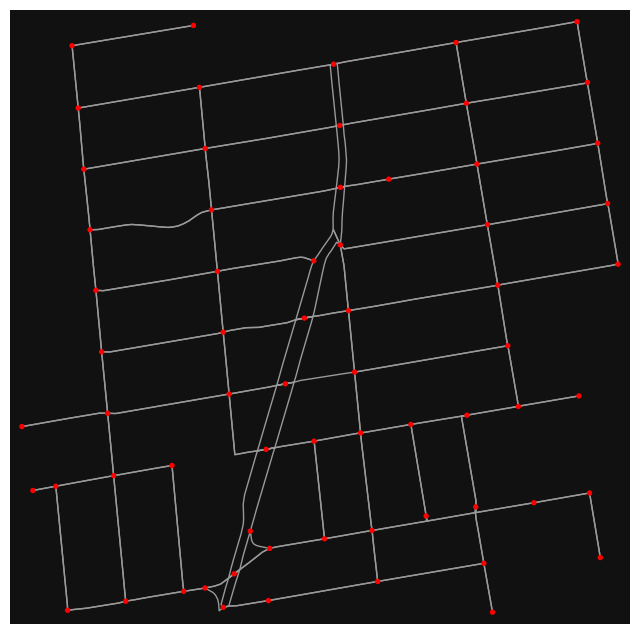

In [6]:
fig, ax = ox.plot_graph(G2, node_color="r")

# 2. Graph simplification (Grafik sadeleştirme)

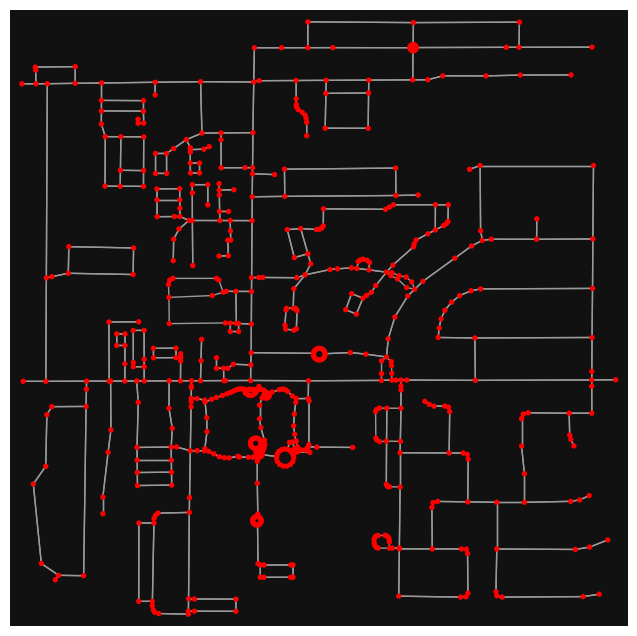

In [8]:
# create a network around some (lat, lng) point and plot it (bazı (lat, lng) noktaları etrafında bir ağ oluştur ve çiz)
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=500, simplify=False)
fig, ax = ox.plot_graph(G, node_color="r")

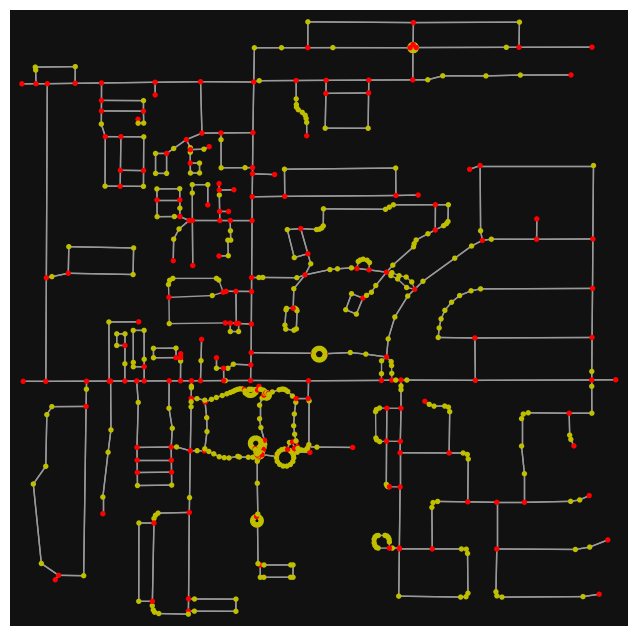

In [9]:
# show which nodes we'd remove if we simplify it (yellow) (basitleştirirsek hangi düğümleri kaldıracağımızı göster (sarı))

nc = ["r" if ox.simplification._is_endpoint(G, node) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

In [10]:
# simplify the network
G2 = ox.simplify_graph(G)

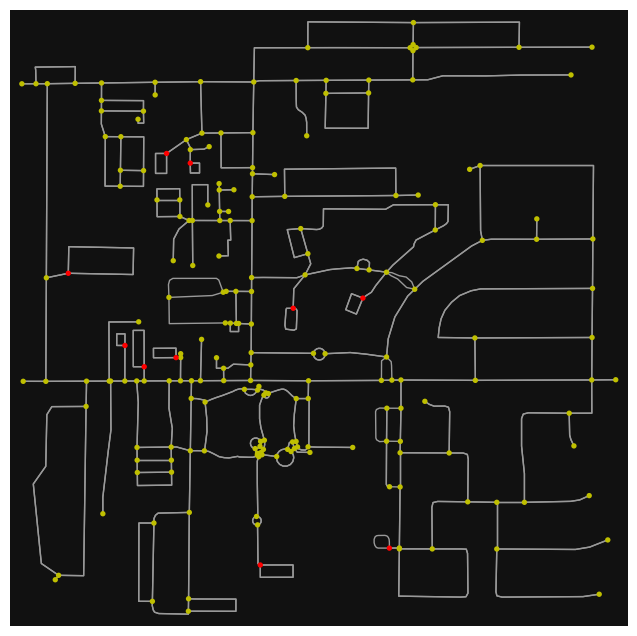

In [12]:
# plot the simplified network and highlight any self-loop edges (basitleştirilmiş ağı çizin ve kendi kendine döngü kenarlarını vurgulayın)
loops = [edge[0] for edge in nx.selfloop_edges(G2)]
nc = ["r" if node in loops else "y" for node in G2.nodes()]
fig, ax = ox.plot_graph(G2, node_color=nc)

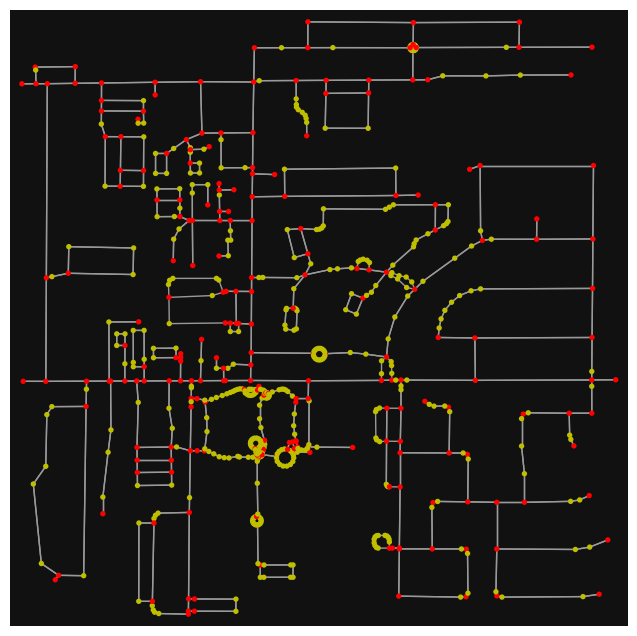

In [13]:
# turn off strict mode and see what nodes we'd remove (strict modu kapatın ve hangi düğümleri kaldıracağımızı görün)
nc = ["r" if ox.simplification._is_endpoint(G, node, strict=False) else "y" for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_color=nc)

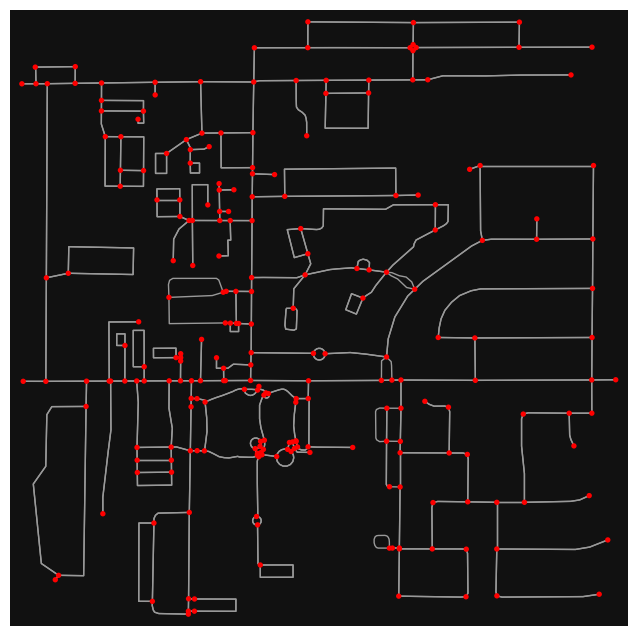

In [14]:
# simplify network with strict mode turned off ( strict mod kapalıyken ağı basitleştirin)
G3 = ox.simplify_graph(G.copy(), strict=False)
fig, ax = ox.plot_graph(G3, node_color="r")

# 3. Cleaning up the periphery of the network (Ağ çevresini temizlem)

In [15]:
# get some bbox
bbox = ox.utils_geo.bbox_from_point((45.518698, -122.679964), dist=300)
north, south, east, west = bbox

C:\Users\Monster\AppData\Local\Programs\Python\Python311\Lib\site-packages\osmnx\graph.py:488: UserWarning: the graph-level street_count attribute will likely be inaccurate when you set clean_periphery=False
  warnings.warn(msg)


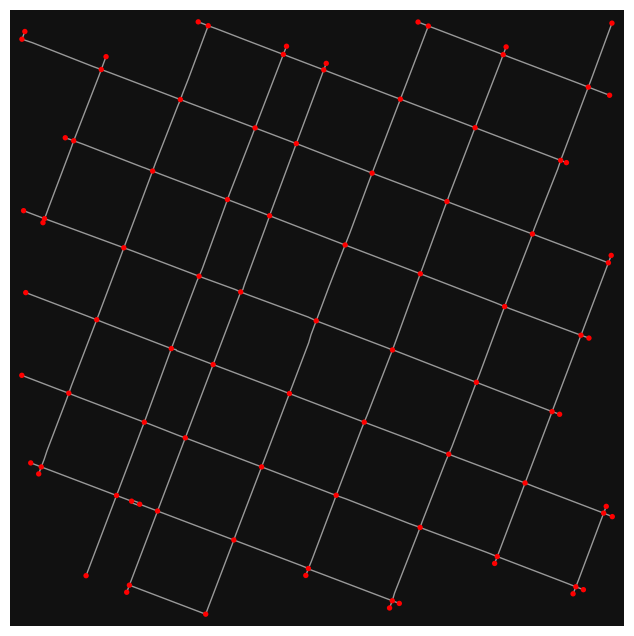

In [18]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive", clean_periphery=False)
fig, ax = ox.plot_graph(G, node_color="r")

In [17]:
# the node degree distribution for this graph has many false cul-de-sacs (bu grafik için düğüm derecesi dağılımında birçok yanlış çıkmaz sokak var)
k = dict(G.degree())
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 30, 2: 2, 3: 6, 4: 52}

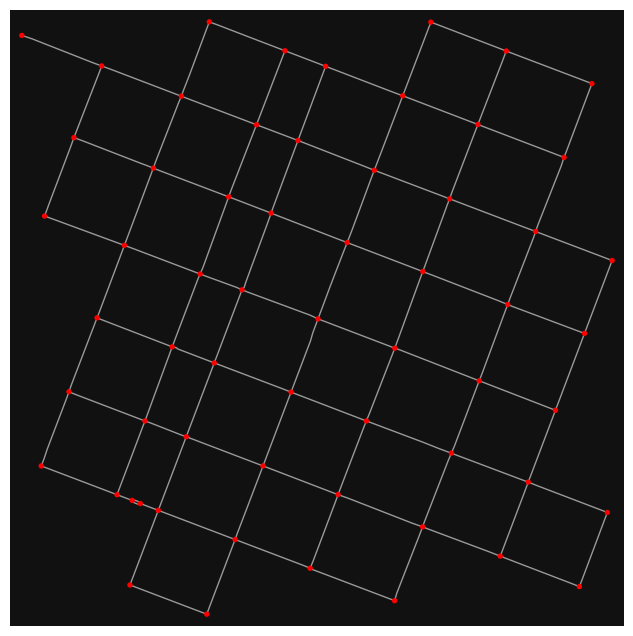

In [19]:
G = ox.graph_from_bbox(north, south, east, west, network_type="drive")
fig, ax = ox.plot_graph(G, node_color="r")

In [20]:
# the streets per node distribution for this cleaned up graph is more accurate (bu temizlenmiş grafik için düğüm başına sokak dağılımı daha doğru)
# dict keys = count of streets emanating from the node (ie, intersections and dead-ends) (düğümden çıkan sokakların sayısı (yani, kavşaklar ve çıkmaz sokaklar))
# dict vals = number of nodes with that count (bu sayıya sahip düğüm sayısı)
k = nx.get_node_attributes(G, "street_count")
{n: list(k.values()).count(n) for n in range(max(k.values()) + 1)}

{0: 0, 1: 0, 2: 0, 3: 3, 4: 57}

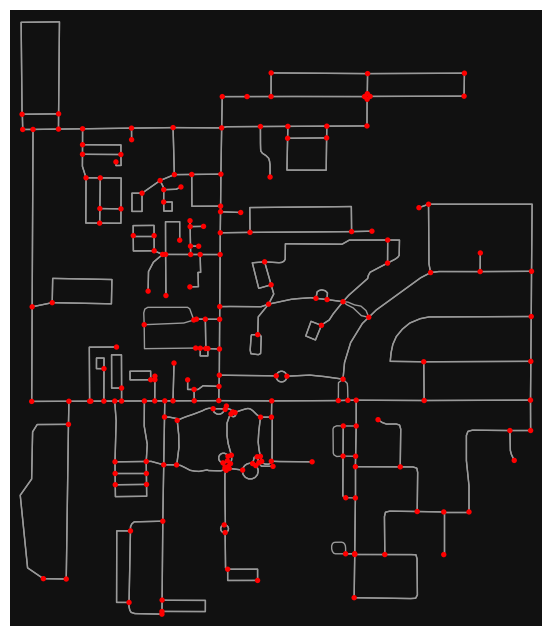

In [21]:
location_point = (33.299896, -111.831638)
G = ox.graph_from_point(location_point, dist=500, simplify=True)
fig, ax = ox.plot_graph(G, node_color="r")